# Correlations between DNS Records and Ranking

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

plt.style.use('seaborn-whitegrid')

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
def create_dataframe(date_str):
    paths = glob.glob('../data/external/openintel-alexa1m-ranking-%s/*.gz' % date_str)
    column_names = ['domain', 'alexa_rank', 'records_count', 'SOA', 'NS', 'A', 'AAAA', 'CNAME', 'MX', 'TXT', 'SPF', 'PTR', 'DNSKEY', 'DS', 'RRSIG', 'CAA', 'NSEC']
    dataframe = pd.concat((pd.read_csv(path, names=column_names) for path in paths))
    return dataframe


def visualise(date_str):
    dataframe = create_dataframe(date_str)
    plt.figure(figsize = (21,9))
    ax = plt.axes()
    ax.set_title('Correlation for %s' % date_str)
    # Compute correlations for certain columns 
    corr_names = ['DNSKEY', 'DS', 'RRSIG', 'CAA', 'NSEC', 'SOA', 'NS', 'A', 'AAAA', 'CNAME', 'MX', 'TXT', 'SPF', 'PTR', 'alexa_rank']
    sns.heatmap(dataframe[corr_names].corr(), annot=True, linewidths=1, ax = ax)

In [3]:
df = create_dataframe('2017-12-10')

In [4]:
df.head()

,domain,alexa_rank,records_count,SOA,NS,A,AAAA,CNAME,MX,TXT,SPF,PTR,DNSKEY,DS,RRSIG,CAA,NSEC
0,miloconcerthall.ru,922412,8,1,4,2,0,0,1,0,0,0,0,0,0,0,0
1,aurora-il.org,644425,19,1,2,7,6,1,1,1,0,0,0,0,2,0,0
2,montrealcollege.ca,748223,12,1,2,1,0,1,5,2,0,0,0,0,0,0,0
3,hobak3onwany.com,618762,12,1,2,4,4,0,1,0,0,0,0,0,0,0,0
4,oguzhanselvan.com,602127,7,1,2,1,0,1,1,1,0,0,0,0,0,0,0


In [5]:
days = ['2016-11-01', '2016-12-15', '2017-02-17', '2017-12-10']

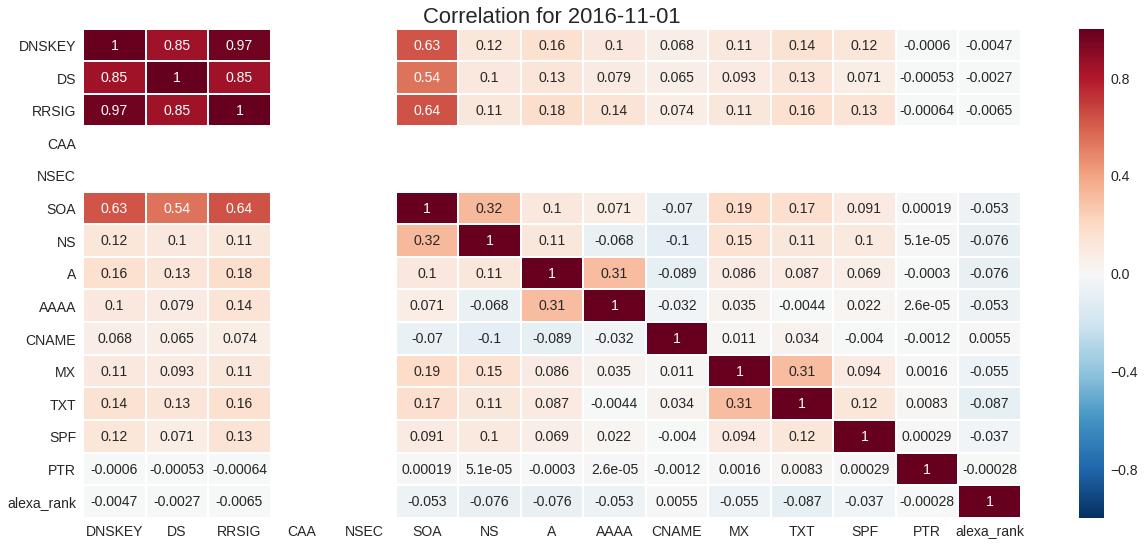

In [6]:
visualise(days[0])

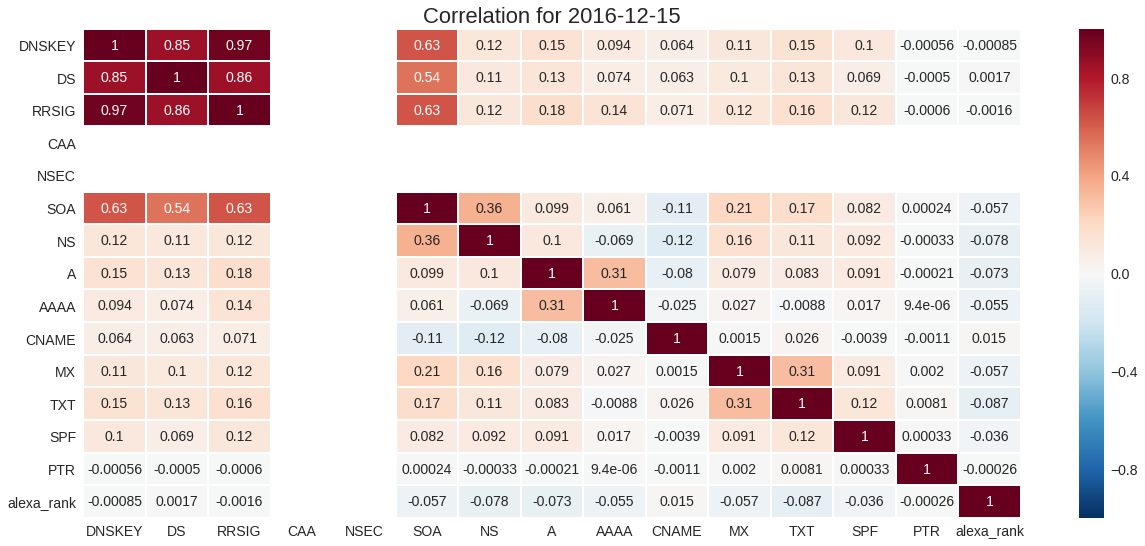

In [7]:
visualise(days[1])

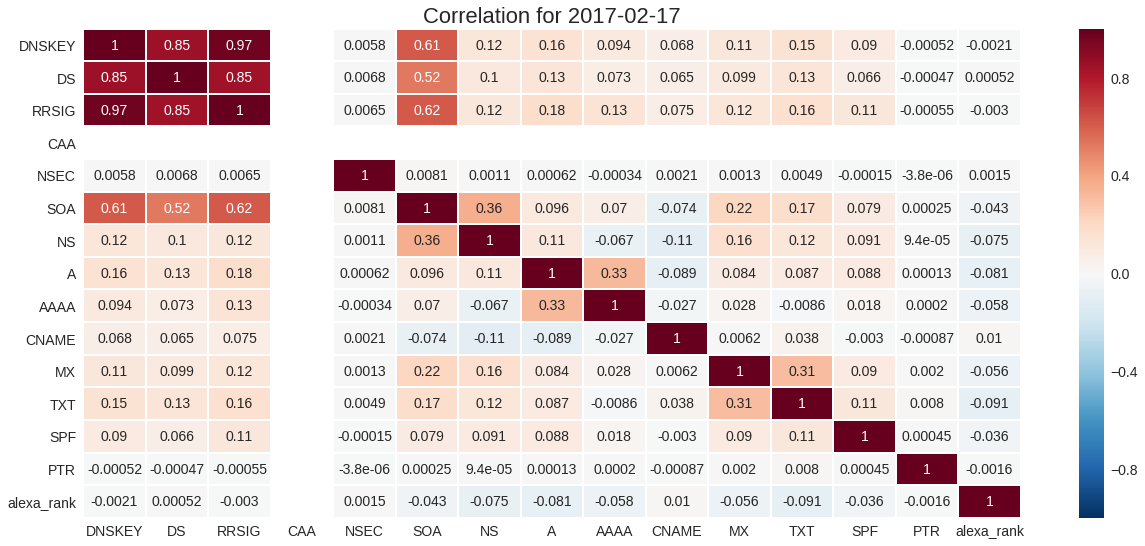

In [8]:
visualise(days[2])

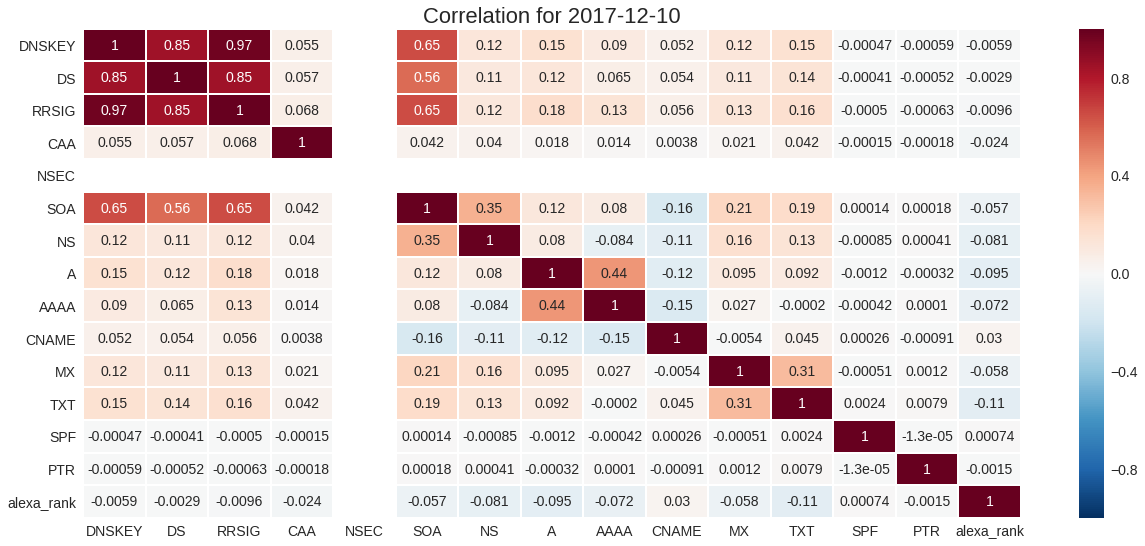

In [9]:
visualise(days[3])